# seagliderOG1 demo

The purpose of this notebook is to demonstrate the functionality of `seagliderOG1` to convert from Seaglider basestation files to OG1 format.

- OG1 format is a newly agreed format (since June 2024) for glider data sets from various platforms (e.g., Seaglider, Slocum, Seaexplorer).  It lives on github here: (https://github.com/OceanGlidersCommunity/OG-format-user-manual).
- OG1 manual: https://oceangliderscommunity.github.io/OG-format-user-manual/OG_Format.html

The test case is to convert sg015 data from the Labrador Sea in September 2004.

The demo is organised to show

- Conversion of a single dive cycle (single `p*.nc` file)

- Conversion for a folder of local dive-cycle files (full mission of `p*.nc` files)

- Download from remote server + conversion (directory with full mission of `p*.nc` files)

Options are provided to only load e.g. 10 files, but note that OG1 format expects a full mission.


In [6]:
# This cell imports for development work
import sys
import importlib
sys.path.append('/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1')
import warnings
warnings.simplefilter("ignore", category=Warning)

In [41]:
from seagliderOG1 import readers, writers, plotters
from seagliderOG1 import convertOG1
import xarray as xr
import os

In [25]:
# Specify the path for writing datafiles
data_path = '../data'

## Reading basestation files

This has three ways to load a glider dataset.

Load an example dataset using `seagliderOG1.fetchers.load_sample_dataset`

Alternatively, use your own with e.g. `ds = xr.open_dataset('/path/to/yourfile.nc')`

### Load single sample dataset

In [ ]:
ds = readers.load_sample_dataset()

In [11]:
ds

<xarray.Dataset>
Dimensions:                       (sg_data_point: 1180, trajectory: 1,
                                   gps_info: 3, gc_event: 140)
Coordinates:
  * trajectory                    (trajectory) int32 500
    longitude                     (sg_data_point) float64 ...
    latitude                      (sg_data_point) float64 ...
    ctd_time                      (sg_data_point) datetime64[ns] ...
    ctd_depth                     (sg_data_point) float64 ...
Dimensions without coordinates: sg_data_point, gps_info, gc_event
Data variables: (12/226)
    surface_curr_north            float64 ...
    surface_curr_east             float64 ...
    start_of_climb_time           timedelta64[ns] ...
    sg_cal_volmax                 float64 ...
    sg_cal_vbd_min_cnts           int32 ...
    sg_cal_vbd_max_cnts           int32 ...
    ...                            ...
    conductivity                  (sg_data_point) float64 ...
    buoyancy                      (sg_data_point) float64 ...
    GPSE_qc                       |S1 ...
    GPS2_qc                       |S1 ...
    GPS1_qc                       |S1 ...
    CTD_qc                        |S1 ...
Attributes: (12/58)
    quality_control_version:         1.1
    base_station_micro_version:      3705
    time_coverage_resolution:        PT1S
    geospatial_vertical_max:         989.6984588132262
    sea_name:                        Labrador Sea
    mission:                         1
    ...                              ...
    disclaimer:                      Data has not been reviewed and is provid...
    geospatial_vertical_positive:    no
    date_created:                    2013-08-01T05:08:54Z
    geospatial_vertical_units:       meter
    dive_number:                     500
    history:                         Processing start:\n05:52:52 01 Aug 2013 ...

### Load datasets from a local directory

In [ ]:
# Specify the input directory on your local machine
input_dir = "/Users/eddifying/Dropbox/data/sg015-ncei-download"

# Load and concatenate all datasets in the input directory
# Optionally, specify the range of profiles to load (start_profile, end_profile)
list_datasets = readers.read_basestation(input_dir, start_profile=500, end_profile=503)

# Where list_datasets is a list of xarray datasets.  A single dataset can be accessed as
ds = list_datasets[0]

In [19]:
ds

<xarray.Dataset>
Dimensions:                       (sg_data_point: 1338, trajectory: 1,
                                   gps_info: 3, gc_event: 148)
Coordinates:
  * trajectory                    (trajectory) int32 503
    longitude                     (sg_data_point) float64 ...
    latitude                      (sg_data_point) float64 ...
    ctd_time                      (sg_data_point) datetime64[ns] ...
    ctd_depth                     (sg_data_point) float64 ...
Dimensions without coordinates: sg_data_point, gps_info, gc_event
Data variables: (12/226)
    surface_curr_north            float64 ...
    surface_curr_east             float64 ...
    start_of_climb_time           timedelta64[ns] ...
    sg_cal_volmax                 float64 ...
    sg_cal_vbd_min_cnts           int32 ...
    sg_cal_vbd_max_cnts           int32 ...
    ...                            ...
    conductivity                  (sg_data_point) float64 ...
    buoyancy                      (sg_data_point) float64 ...
    GPSE_qc                       |S1 ...
    GPS2_qc                       |S1 ...
    GPS1_qc                       |S1 ...
    CTD_qc                        |S1 ...
Attributes: (12/58)
    quality_control_version:         1.1
    base_station_micro_version:      3705
    time_coverage_resolution:        PT1S
    geospatial_vertical_max:         984.1416311048997
    sea_name:                        Labrador Sea
    mission:                         1
    ...                              ...
    disclaimer:                      Data has not been reviewed and is provid...
    geospatial_vertical_positive:    no
    date_created:                    2013-08-01T05:08:02Z
    geospatial_vertical_units:       meter
    dive_number:                     503
    history:                         Processing start:\n05:52:59 01 Aug 2013 ...

### Load datasets from a remote directory (URL)

In [28]:
# Specify the server where data are located
server = "https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/015/20040924/"

# Load and concatenate all datasets from the server, optionally specifying the range of profiles to load
list_datasets = readers.read_basestation(server, start_profile=500, end_profile=503)

## Convert to OG1 format

### Convert a single (sample) dataset

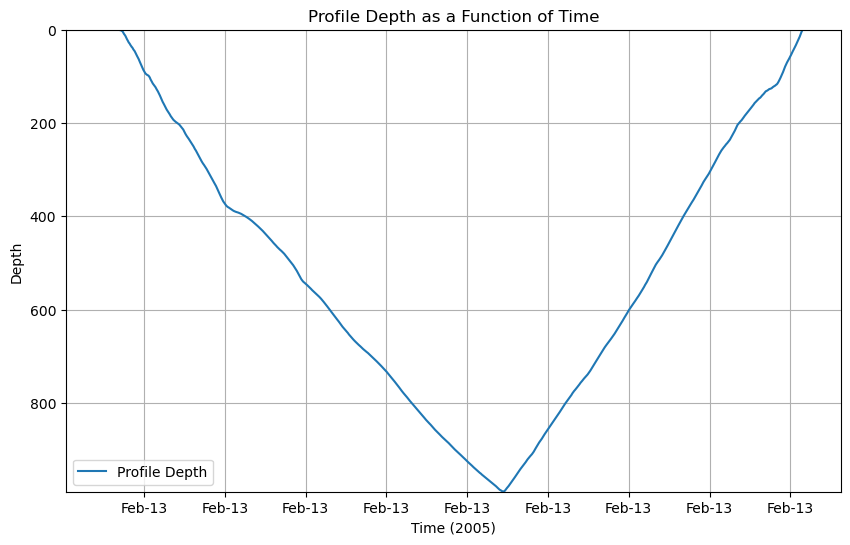

In [30]:
# Loads one dataset (p0150500_20050213.nc)
ds = readers.load_sample_dataset()

ds_OG1 = convertOG1.convert_to_OG1(ds)

# Check the results - uncomment the following lines to either generate a plot or show the variables.
plotters.plot_profile_depth(ds_OG1)

In [31]:
# Print to screen a table of the variables and variable attributes
plotters.show_variables(ds_OG1)

information is based on xarray Dataset


,dims,units,comment,standard_name,dtype
name,,,,,
CNDC,N_MEASUREMENTS,S m-1,Conductivity corrected for anomalies,sea_water_electrical_conductivity,float64
CNDC_QC,N_MEASUREMENTS,,Whether to trust each corrected conductivity value,,object
CNDC_RAW,N_MEASUREMENTS,S/m,Uncorrected conductivity,,float64
CNDC_RAW_QC,N_MEASUREMENTS,,Whether to trust each raw conductivity value,,object
DEPTH,N_MEASUREMENTS,m,CTD thermistor depth corrected for average latitude,depth,float64
DEPTH_Z,N_MEASUREMENTS,meters,"Depth calculated from pressure using gsw library, positive up.",depth,float64
GLIDER_HORZ_VELO_MODEL,N_MEASUREMENTS,m s-1,,,float64
GLIDER_VERT_VELO_MODEL,N_MEASUREMENTS,m s-1,,,float64
GLIDE_ANGLE,N_MEASUREMENTS,m s-1,,,float64


### Convert mission from a local directory of basestation files

- For local data in the directory `input_dir`
- Creates a plot of ctd_depth against ctd_time.


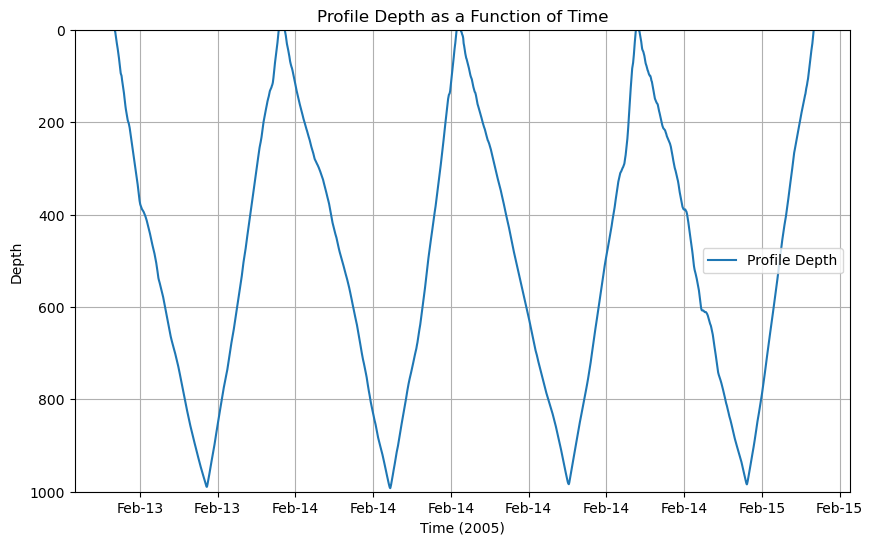

In [32]:
# Specify the input directory on your local machine
input_dir = "/Users/eddifying/Dropbox/data/sg015-ncei-download"

# Load and concatenate all datasets in the input directory
# Optionally, specify the range of profiles to load (start_profile, end_profile)
list_datasets = readers.read_basestation(input_dir, start_profile=500, end_profile=503)

# Convert the list of datasets to OG1
ds_OG1 = convertOG1.convert_to_OG1(list_datasets)

# Generate a simple plot
plotters.plot_profile_depth(ds_OG1)
#plotters.show_contents(ds_all,'attrs')

### Convert mission from the NCEI server (with p*nc files)

- Data from the sg015 mission in the Labrador Sea (https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.nodc:0111844), dataset identifier gov.noaa.nodc:0111844.


In [33]:
# Specify the server where data are located
server = "https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/015/20040924/"

# Load and concatenate all datasets from the server, optionally specifying the range of profiles to load
list_datasets = readers.read_basestation(server, start_profile=500, end_profile=503)

# Convert the list of datasets to OG1
ds_OG1 = convertOG1.convert_to_OG1(list_datasets)

## Saving data

Due to problems with writing `xarray` datasets as netCDF when attributes are not of a specified type (`str`, `Number`, `np.ndarray`, `np.number`, `list`, `tuple`), a function was written `save_dataset`.

In [ ]:
# Write the file
# This writer catches errors in data types (DType errors) when using xr.to_netcdf()
# The solution is to convert them to strings, which may be undesired behaviour
output_file = os.path.join(data_path, 'demo_test.nc')
if os.path.exists(output_file):
    os.remove(output_file) 

writers.save_dataset(ds_OG1, output_file);

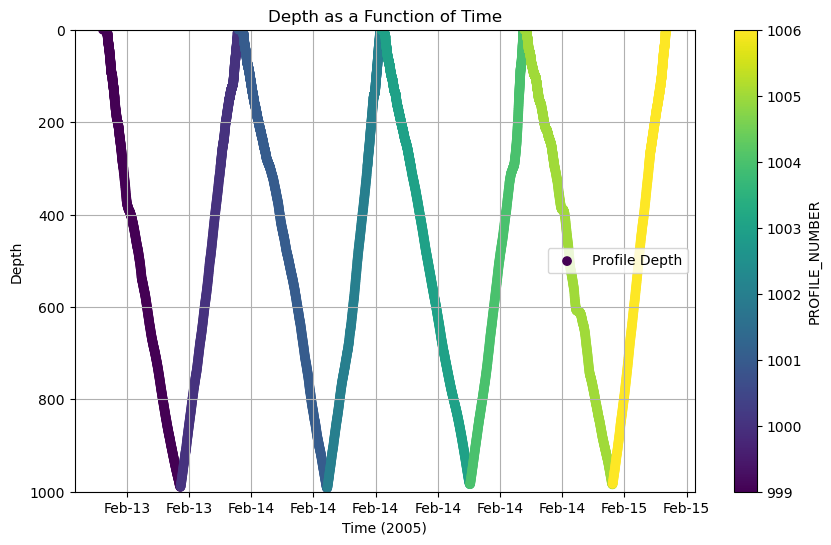

In [ ]:
# Load the data saved
ds1 = xr.open_dataset(output_file)

# Generate a simple plot
#plotters.show_contents(ds_all,'attrs')
plotters.plot_depth_colored(ds1, color_by='PROFILE_NUMBER')


## Run multiple missions

In [ ]:
importlib.reload(convertOG1)
# Specify a list of servers or local directories
input_locations = [
    # Either Iceland, Faroes or RAPID/MOCHA
    "https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/005/20090829/", # done
    "https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/005/20080606/", # done
    "https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/005/20081106/", # done
    "https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/012/20070831/", # done
    "https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/014/20080214/",  # done
    "https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/014/20080222/", # done
    "https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/016/20061112/",  # done
    "https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/016/20090605/", # done
    "https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/016/20071113/", # done
    "https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/016/20080607/",  # done
    "https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/033/20100518/", # failed - ok after update to save_dataset
    "https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/033/20100903/",
    "https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/101/20081108/",
    "https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/101/20061112/",
    "https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/101/20070609/",
    "https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/102/20061112/",
    # Labrador Sea
    "https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/015/20040924/",
    "https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/014/20040924/",
    "https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/008/20031002/",
    "https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/004/20031002/",
    "https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/016/20050406/",
    # RAPID/MOCHA
    "https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/033/20100729/",
    "https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/034/20110128/",
]

for input_loc in input_locations:
    # Example usage
    ds_all = convertOG1.process_and_save_data(input_loc, output_dir=data_path, save=True,  run_quietly=True)

https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/005/20090829/
